In [9]:
!{sys.executable} -m pip install yfinance pandas matplotlib

  Using cached yfinance-0.2.66-py2.py3-none-any.whl.metadata (6.0 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ------------------------------------- 949.2/949.2 kB 11.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl.metadata (13 kB)
Using cached yfinance-0.2.66-py2.py3-none-an


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\Yohansu\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [11]:
# Importing the required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

print("All libraries imported successfully")

All libraries imported successfully


In [13]:
# Download 1 year of daily data
data = yf.download(["AAPL", "MSFT"], start="2023-10-01", end="2024-10-01")

# Show the first few rows
data.head()

C:\Users\Yohansu\AppData\Local\Temp\ipykernel_2968\1168571113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(["AAPL", "MSFT"], start="2023-10-01", end="2024-10-01")
[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2023-10-02  172.064636  317.022461  172.609304  317.111151  169.271983   
2023-10-03  170.727722  308.737366  171.945802  316.618596  169.163061   
2023-10-04  171.975510  314.224701  172.520178  315.288684  169.311600   
2023-10-05  173.213394  314.618683  173.748150  315.229503  171.005014   
2023-10-06  175.768372  322.401459  176.263522  324.302798  171.500165   

Price                         Open                Volume            
Ticker            MSFT        AAPL        MSFT      AAPL      MSFT  
Date                                                                
2023-10-02  310.500748  169.559178  311.584423  52164500  20570000  
2023-10-03  306.589708  170.589081  316.066882  49594600  21033500  
2023-10-04  309.338346  169.430431  309.367899  53020300  20720100  
2023-10-05  310.224906  172.104248  314.352702  48527900  16965600  
2023-10-06  311.604151  172.114162  311.850439  57266700  25673600

In [14]:
# Extracting closing prices only
close_prices = data["Close"]

close_prices.head()

Ticker,AAPL,MSFT
Date,,
2023-10-02,172.064636,317.022461
2023-10-03,170.727722,308.737366
2023-10-04,171.975510,314.224701
2023-10-05,173.213394,314.618683
2023-10-06,175.768372,322.401459


In [17]:
# Computing descriptive statistics
# Mean, median, mode, variance, std, min, max

mean = close_prices.mean()
median = close_prices.median()
mode = close_prices.mode().iloc[0]
variance = close_prices.var()
std_dev = close_prices.std()
min_val = close_prices.min()
max_val = close_prices.max()

summary = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Mode": mode,
    "Variance": variance,
    "Std Dev": std_dev,
    "Min": min_val,
    "Max": max_val
})

summary

,Mean,Median,Mode,Variance,Std Dev,Min,Max
Ticker,,,,,,,
AAPL,192.935770,188.355301,168.092896,401.671567,20.041746,163.823578,233.461990
MSFT,398.327443,405.853058,409.081177,1141.543700,33.786739,308.737366,463.240967


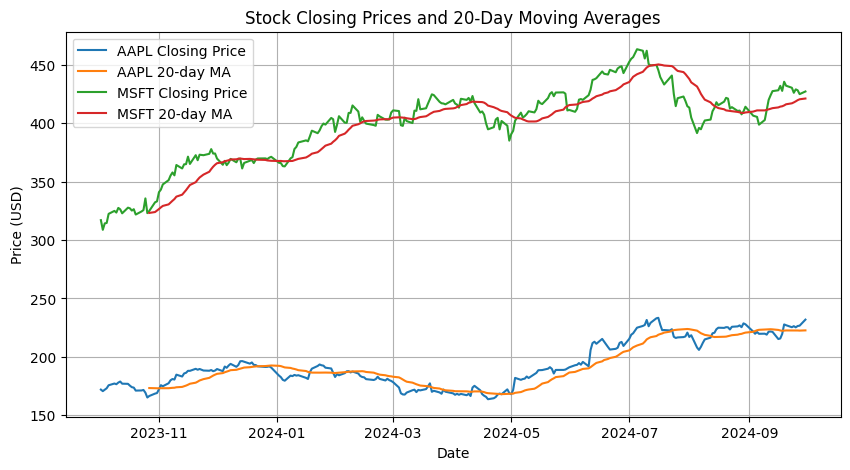

In [18]:
plt.figure(figsize=(10,5))
plt.plot(close_prices.index, close_prices["AAPL"], label="AAPL Closing Price")
plt.plot(close_prices.index, close_prices["AAPL"].rolling(window=20).mean(), label="AAPL 20-day MA")
plt.plot(close_prices.index, close_prices["MSFT"], label="MSFT Closing Price")
plt.plot(close_prices.index, close_prices["MSFT"].rolling(window=20).mean(), label="MSFT 20-day MA")
plt.title("Stock Closing Prices and 20-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()